In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical



In [3]:
# Define the image size and paths
IMG_HEIGHT = 128
IMG_WIDTH = 128
IMG_CHANNELS = 3

# Paths to your datasets
arrogance_path = 'model_pics\quarrel'
washrooms_path = 'model_pics\washrooms'
coaches_path = 'model_pics\coaches'

# Function to load images and labels
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
            images.append(img)
            labels.append(label)
    return images, labels

# Load data
arrogance_images, arrogance_labels = load_images_from_folder(arrogance_path, 0)
washrooms_images, washrooms_labels = load_images_from_folder(washrooms_path, 1)
coaches_images, coaches_labels = load_images_from_folder(coaches_path, 2)

# Combine data
images = np.array(arrogance_images + washrooms_images + coaches_images)
labels = np.array(arrogance_labels + washrooms_labels + coaches_labels)

# Normalize the images
images = images / 255.0

# One-hot encode the labels
labels = to_categorical(labels, num_classes=3)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,027 (12.61 MB)

 Trainable params: 3,305,027 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.2f}")


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - accuracy: 0.3818 - loss: 1.2086 - val_accuracy: 0.6346 - val_loss: 1.0322
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.5406 - loss: 1.0177 - val_accuracy: 0.5385 - val_loss: 0.9491
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.5688 - loss: 0.9225 - val_accuracy: 0.7212 - val_loss: 0.7600
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - accuracy: 0.6881 - loss: 0.7465 - val_accuracy: 0.7308 - val_loss: 0.6303
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.7394 - loss: 0.6649 - val_accuracy: 0.8269 - val_loss: 0.5561
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - accuracy: 0.8012 - loss: 0.5017 - val_accuracy: 0.7404 - val_loss: 0.5880
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.8796 - loss: 0.3979 - val_accuracy: 0.8077 - val_loss: 0.5916
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.8971 - loss: 0.2570 - val_accuracy: 0.

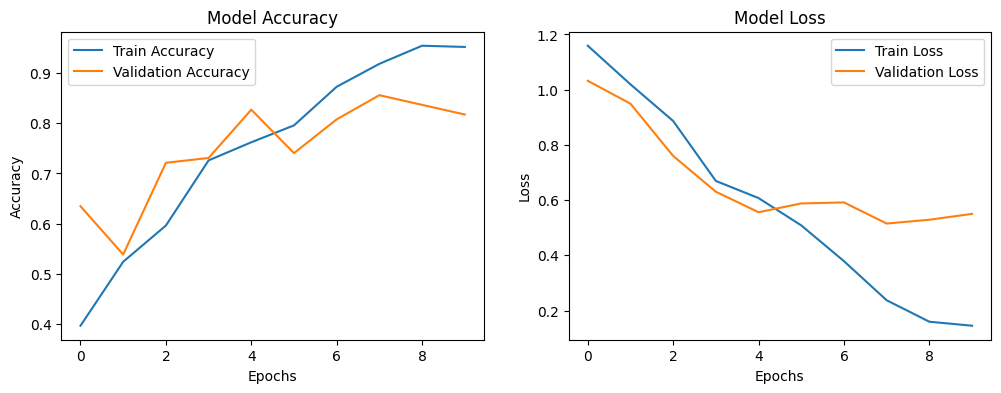

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Prediction: Coaches


In [10]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Test the model on a new image
def predict_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)
    class_index = np.argmax(prediction)
    class_names = ["Arrogance", "Washrooms", "Coaches"]
    print(f"Prediction: {class_names[class_index]}")

# Example usage
predict_image('model_pics\coaches\8.jpg')


In [11]:
model.save('cv_model_v3.h5')


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


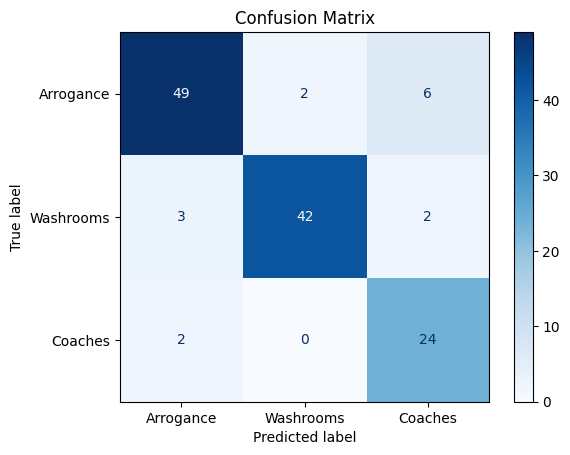

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict labels for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Define class names (order should match the labels)
class_names = ['Arrogance', 'Washrooms', 'Coaches']

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)

plt.title('Confusion Matrix')
plt.show()


In [13]:
predict_image('model_pics\coaches\8.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Prediction: Coaches


In [14]:
def predict_image(model, img_path):
    # Load image
    img = cv2.imread(img_path)
    # Resize image
    img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
    # Convert BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Normalize
    img = img / 255.0
    # Expand dimensions to match model input
    img = np.expand_dims(img, axis=0)
    
    # Predict
    prediction = model.predict(img)
    class_idx = np.argmax(prediction, axis=1)[0]
    class_labels = ['Violence', 'Toilet', 'Coach']
    confidence = prediction[0][class_idx] * 100
    
    # Display result
    plt.imshow(cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB))
    plt.title(f"Prediction: {class_labels[class_idx]} ({confidence:.2f}%)")
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


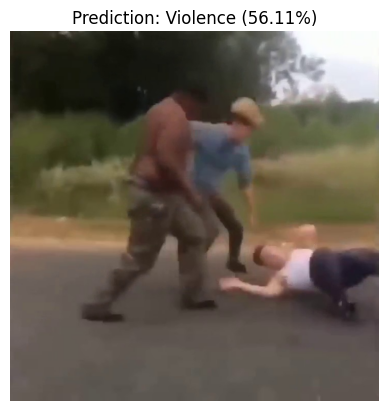

In [17]:
test_image_path = 'model_pics\quarrel\81.jpg'
predict_image(model, test_image_path)
